# QSAR Analysis of Telomerase Inhibitors Part 2 - Exploratory Data Analysis

Import libraries

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='ticks')

from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

Load the bioactivity data

In [2]:
df = pd.read_csv("datasets/telomerase_03_curated.csv")
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL314057,CCN(CC)CC.O=C(N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,7300.0,intermediate
1,CHEMBL266842,CC(C)(C)OC(=O)N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[...,100000.0,inactive
2,CHEMBL314847,CC(C)(C)OC(=O)N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,100000.0,inactive
3,CHEMBL86984,CC(C)(C)OC(=O)N1CCC[C@@H]1C(=O)N[C@H](Cc1c[nH]...,9500.0,intermediate
4,CHEMBL87554,CCN(CC)CC.N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[C@H]...,100000.0,inactive
...,...,...,...,...
660,CHEMBL4632724,Cc1cn([C@H]2C[C@H](n3cc(COC(=O)c4ccc(S(N)(=O)=...,6000.0,intermediate
661,CHEMBL4637598,Cc1cn([C@H]2C[C@H](n3cc(CNC(=O)c4ccc(S(N)(=O)=...,9100.0,intermediate
662,CHEMBL4634543,Cc1cn([C@H]2C[C@H](n3cc(C[Se]c4ccc(NC(=S)Nc5cc...,5600.0,intermediate
663,CHEMBL4857212,O=C(OCCn1c([N+](=O)[O-])cnc1/C=C/c1ccc2ccccc2c...,980.0,active


In [3]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [4]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [5]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL314057,7300.0,intermediate,O=C(N[C@H](Cc1c[nH]c2ccccc12)C(=O)NCCCCCCCCCCC...
1,CHEMBL266842,100000.0,inactive,CC(C)(C)OC(=O)N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[...
2,CHEMBL314847,100000.0,inactive,CC(C)(C)OC(=O)N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...
3,CHEMBL86984,9500.0,intermediate,CC(C)(C)OC(=O)N1CCC[C@@H]1C(=O)N[C@H](Cc1c[nH]...
4,CHEMBL87554,100000.0,inactive,N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[C@H](Cc1c[nH]c...
...,...,...,...,...
660,CHEMBL4632724,6000.0,intermediate,Cc1cn([C@H]2C[C@H](n3cc(COC(=O)c4ccc(S(N)(=O)=...
661,CHEMBL4637598,9100.0,intermediate,Cc1cn([C@H]2C[C@H](n3cc(CNC(=O)c4ccc(S(N)(=O)=...
662,CHEMBL4634543,5600.0,intermediate,Cc1cn([C@H]2C[C@H](n3cc(C[Se]c4ccc(NC(=S)Nc5cc...
663,CHEMBL4857212,980.0,active,O=C(OCCn1c([N+](=O)[O-])cnc1/C=C/c1ccc2ccccc2c...


Create a function to calculate Lipinski descriptors

In [6]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i = 0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i == 0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i = i + 1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [7]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,682.198,8.37560,4.0,5.0
1,922.417,6.35110,8.0,9.0
2,594.045,6.12970,4.0,6.0
3,775.324,8.46130,4.0,7.0
4,822.300,4.78510,8.0,8.0
...,...,...,...,...
660,506.497,-1.03798,3.0,12.0
661,505.513,-1.46498,4.0,11.0
662,691.654,-0.05638,5.0,11.0
663,464.481,5.52010,0.0,7.0


Combine the dataframe

In [8]:
df_combined = pd.concat([df,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL314057,CCN(CC)CC.O=C(N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,7300.0,intermediate,682.198,8.37560,4.0,5.0
1,CHEMBL266842,CC(C)(C)OC(=O)N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[...,100000.0,inactive,922.417,6.35110,8.0,9.0
2,CHEMBL314847,CC(C)(C)OC(=O)N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,100000.0,inactive,594.045,6.12970,4.0,6.0
3,CHEMBL86984,CC(C)(C)OC(=O)N1CCC[C@@H]1C(=O)N[C@H](Cc1c[nH]...,9500.0,intermediate,775.324,8.46130,4.0,7.0
4,CHEMBL87554,CCN(CC)CC.N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[C@H]...,100000.0,inactive,822.300,4.78510,8.0,8.0
...,...,...,...,...,...,...,...,...
660,CHEMBL4632724,Cc1cn([C@H]2C[C@H](n3cc(COC(=O)c4ccc(S(N)(=O)=...,6000.0,intermediate,506.497,-1.03798,3.0,12.0
661,CHEMBL4637598,Cc1cn([C@H]2C[C@H](n3cc(CNC(=O)c4ccc(S(N)(=O)=...,9100.0,intermediate,505.513,-1.46498,4.0,11.0
662,CHEMBL4634543,Cc1cn([C@H]2C[C@H](n3cc(C[Se]c4ccc(NC(=S)Nc5cc...,5600.0,intermediate,691.654,-0.05638,5.0,11.0
663,CHEMBL4857212,O=C(OCCn1c([N+](=O)[O-])cnc1/C=C/c1ccc2ccccc2c...,980.0,active,464.481,5.52010,0.0,7.0


Convert IC50 to pIC50

pIC50 = -log10(IC50)

Why? to make IC50 data to be more uniformly distributed

In [9]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)
        
    return x

In [10]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)
        
    return x

In [11]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL314057,CCN(CC)CC.O=C(N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,intermediate,682.198,8.37560,4.0,5.0,7300.0
1,CHEMBL266842,CC(C)(C)OC(=O)N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[...,inactive,922.417,6.35110,8.0,9.0,100000.0
2,CHEMBL314847,CC(C)(C)OC(=O)N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,inactive,594.045,6.12970,4.0,6.0,100000.0
3,CHEMBL86984,CC(C)(C)OC(=O)N1CCC[C@@H]1C(=O)N[C@H](Cc1c[nH]...,intermediate,775.324,8.46130,4.0,7.0,9500.0
4,CHEMBL87554,CCN(CC)CC.N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[C@H]...,inactive,822.300,4.78510,8.0,8.0,100000.0
...,...,...,...,...,...,...,...,...
660,CHEMBL4632724,Cc1cn([C@H]2C[C@H](n3cc(COC(=O)c4ccc(S(N)(=O)=...,intermediate,506.497,-1.03798,3.0,12.0,6000.0
661,CHEMBL4637598,Cc1cn([C@H]2C[C@H](n3cc(CNC(=O)c4ccc(S(N)(=O)=...,intermediate,505.513,-1.46498,4.0,11.0,9100.0
662,CHEMBL4634543,Cc1cn([C@H]2C[C@H](n3cc(C[Se]c4ccc(NC(=S)Nc5cc...,intermediate,691.654,-0.05638,5.0,11.0,5600.0
663,CHEMBL4857212,O=C(OCCn1c([N+](=O)[O-])cnc1/C=C/c1ccc2ccccc2c...,active,464.481,5.52010,0.0,7.0,980.0


In [12]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL314057,CCN(CC)CC.O=C(N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,intermediate,682.198,8.37560,4.0,5.0,5.136677
1,CHEMBL266842,CC(C)(C)OC(=O)N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[...,inactive,922.417,6.35110,8.0,9.0,4.000000
2,CHEMBL314847,CC(C)(C)OC(=O)N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,inactive,594.045,6.12970,4.0,6.0,4.000000
3,CHEMBL86984,CC(C)(C)OC(=O)N1CCC[C@@H]1C(=O)N[C@H](Cc1c[nH]...,intermediate,775.324,8.46130,4.0,7.0,5.022276
4,CHEMBL87554,CCN(CC)CC.N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[C@H]...,inactive,822.300,4.78510,8.0,8.0,4.000000
...,...,...,...,...,...,...,...,...
660,CHEMBL4632724,Cc1cn([C@H]2C[C@H](n3cc(COC(=O)c4ccc(S(N)(=O)=...,intermediate,506.497,-1.03798,3.0,12.0,5.221849
661,CHEMBL4637598,Cc1cn([C@H]2C[C@H](n3cc(CNC(=O)c4ccc(S(N)(=O)=...,intermediate,505.513,-1.46498,4.0,11.0,5.040959
662,CHEMBL4634543,Cc1cn([C@H]2C[C@H](n3cc(C[Se]c4ccc(NC(=S)Nc5cc...,intermediate,691.654,-0.05638,5.0,11.0,5.251812
663,CHEMBL4857212,O=C(OCCn1c([N+](=O)[O-])cnc1/C=C/c1ccc2ccccc2c...,active,464.481,5.52010,0.0,7.0,6.008774


In [13]:
df_final.to_csv("datasets/telomerase_04_pIC50.csv")

Remove the "intermediate" class

In [14]:
df_no_intermediate = df_final[df_final['class'] != 'intermediate']
df_no_intermediate

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL266842,CC(C)(C)OC(=O)N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[...,inactive,922.417000,6.3511,8.0,9.0,4.000000
2,CHEMBL314847,CC(C)(C)OC(=O)N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,inactive,594.045000,6.1297,4.0,6.0,4.000000
4,CHEMBL87554,CCN(CC)CC.N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[C@H]...,inactive,822.300000,4.7851,8.0,8.0,4.000000
5,CHEMBL421541,CC(C)(C)OC(=O)N[C@H](Cc1cc2ccccc2[nH]1)C(=O)N[...,inactive,864.421000,9.6791,6.0,7.0,4.000000
6,CHEMBL313345,CCN(CC)CC.O=C(N[C@H](Cc1c[nH]c2ccccc12)C(=O)NC...,inactive,675.207000,6.8138,5.0,6.0,4.000000
...,...,...,...,...,...,...,...,...
652,CHEMBL4076246,C/C(=C\C(=O)Nc1cc([123I])ccc1C(=O)O)c1ccc2cccc...,inactive,453.268589,5.1846,2.0,2.0,4.551603
653,CHEMBL4081286,O=c1cc(-c2cc(O)c(O)cc2[123I])oc2c(O)c(O)ccc12,active,408.136589,2.8870,4.0,6.0,6.013721
654,CHEMBL4062047,C/C(=C\C(=O)Nc1ccc([123I])cc1C(=O)O)c1ccc2cccc...,inactive,453.268589,5.1846,2.0,2.0,4.521578
657,CHEMBL4204705,CN(C)CCCCn1c2ccc(-c3nc4ccc(N5CCN(CCO)CC5)cc4[n...,active,754.984000,5.4515,4.0,10.0,6.522879


In [15]:
df_no_intermediate.to_csv("datasets/telomerase_05_2class_pIC50.csv")

## Chemical Space Analysis

Create a countplot of the bioactivity classes

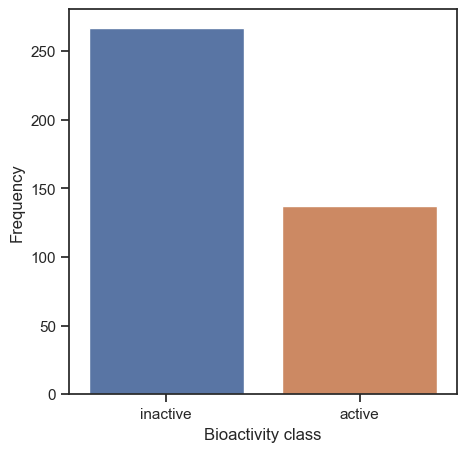

In [32]:
plt.figure(figsize=(5, 5))
sns.countplot(x="class", data=df_no_intermediate)
plt.xlabel("Bioactivity class")
plt.ylabel("Frequency");

Create a scatterplot of MW vs. LogP

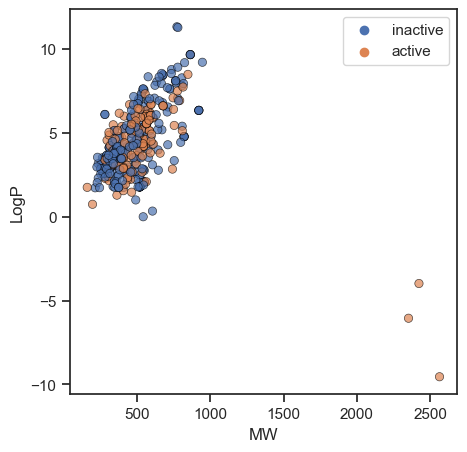

In [41]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x="MW", y="LogP", data=df_no_intermediate, hue="class", edgecolor="black", alpha=0.7)
plt.xlabel("MW")
plt.ylabel("LogP")
plt.legend();

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

Create a function to do Mann-Whitney U Test

In [46]:
def mannwhitney(descriptor, verbose=False):
  # Source: https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu
  seed(1)

  selection = [descriptor, 'class']
  df = df_no_intermediate[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_no_intermediate[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

  stat, p = mannwhitneyu(active, inactive)

  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])

  return results

Create a boxplot of pIC50

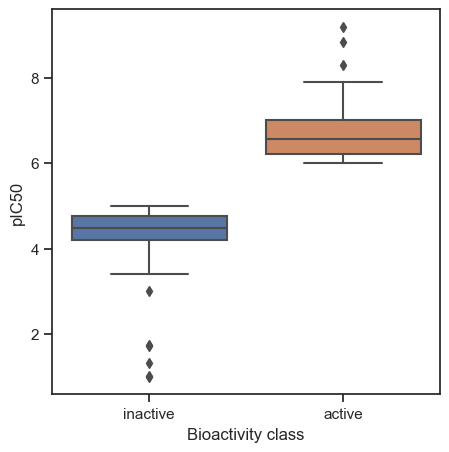

In [40]:
plt.figure(figsize=(5, 5))
sns.boxplot(x = "class", y = "pIC50", data = df_no_intermediate)
plt.xlabel("Bioactivity class")
plt.ylabel("pIC50");

In [47]:
mannwhitney("pIC50")

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,36579.0,6.308983e-61,0.05,Different distribution (reject H0)


Create a boxplot of MW

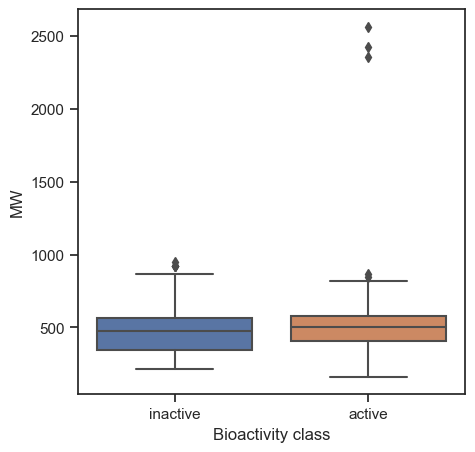

In [48]:
plt.figure(figsize=(5, 5))
sns.boxplot(x = "class", y = "MW", data = df_no_intermediate)
plt.xlabel("Bioactivity class")
plt.ylabel("MW");

In [57]:
mannwhitney("MW")

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,20619.5,0.03603,0.05,Different distribution (reject H0)


Create a boxplot of LogP

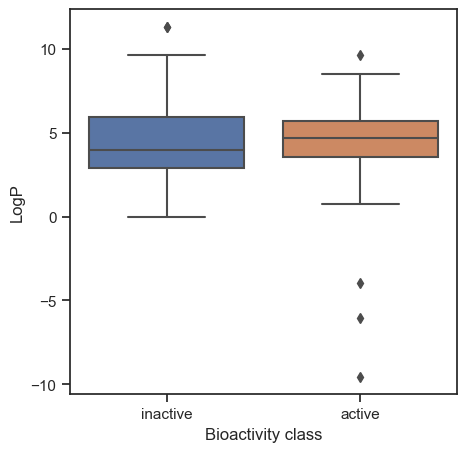

In [50]:
plt.figure(figsize=(5, 5))
sns.boxplot(x = "class", y = "LogP", data = df_no_intermediate)
plt.xlabel("Bioactivity class")
plt.ylabel("LogP");

In [51]:
mannwhitney("LogP")

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,20317.5,0.068034,0.05,Same distribution (fail to reject H0)


Create a boxplot of NumHDonors

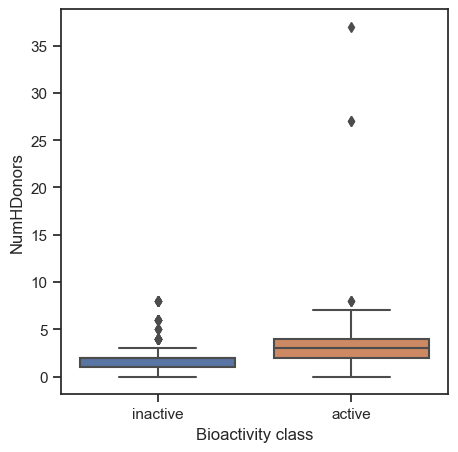

In [53]:
plt.figure(figsize=(5, 5))
sns.boxplot(x = "class", y = "NumHDonors", data = df_no_intermediate)
plt.xlabel("Bioactivity class")
plt.ylabel("NumHDonors");

In [54]:
mannwhitney("NumHDonors")

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,24414.0,1.774017e-08,0.05,Different distribution (reject H0)


Create a boxplot of NumHAcceptors

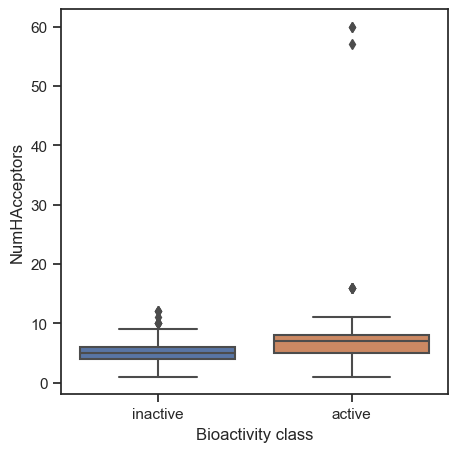

In [55]:
plt.figure(figsize=(5, 5))
sns.boxplot(x = "class", y = "NumHAcceptors", data = df_no_intermediate)
plt.xlabel("Bioactivity class")
plt.ylabel("NumHAcceptors");

In [56]:
mannwhitney("NumHAcceptors")

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,23513.5,0.000002,0.05,Different distribution (reject H0)


## Interpretation

All Lipinski's descriptors except LogP are statistical significant